In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'png'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2NoZXJ5bGtvdWFkaW8vRG9jdW1lbnRzL1JlcG9zaXRvcmllcy9wZXJzb25hbC13ZWJzaXRlLzNBL3Byb2Nfc3RvY2hhc3RpcXVl'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

/var/folders/4g/2x7xwt6106l13nxqljfks4gm0000gn/T/ipykernel_31327/973001745.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap.py": 1731323902.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap_external.py": 1731323902.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/codecs.py": 1731323889.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/aliases.py": 1731323904.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/cp437.py": 1731323905.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/__init__.py": 1731323904.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/utf_8.py": 1731323906.0, "/Library/Developer/CommandLineT

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data = pd.read_excel('data/Data_tx.xlsx', sheet_name='tx_marche')
data.columns = ['type', 'T', 'tx']
data

,type,T,tx
0,MM,0.25,0.030698
1,MM,0.50,0.026191
2,MM,0.75,0.023958
3,MM,1.00,0.022979
4,FUT,1.25,0.978691
5,FUT,1.50,0.977094
6,FUT,1.75,0.974981
7,FUT,2.00,0.972911
8,FUT,2.25,0.970984
9,FUT,2.50,0.969711


In [3]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

def interpolate_and_update_df(data, col_x, col_y, kind='cubic', start=3, end=30, step=1):
    """
    Interpole les taux SWAP et met à jour le DataFrame avec les nouvelles valeurs interpolées.

    Paramètres :
    - data : DataFrame d'origine contenant une colonne 'type' avec 'SWAP', 'T' et 'tx'.
    - kind : Type d'interpolation (par défaut 'cubic', peut être 'linear', 'quadratic', etc.).
    - start : Valeur minimale de T pour l'interpolation (par défaut 3).
    - end : Valeur maximale de T pour l'interpolation (par défaut 31).
    - step : Pas d'incrémentation pour la grille interpolée (par défaut 1).

    Retourne :
    - new_df : DataFrame mis à jour avec les taux SWAP interpolés.
    """

    data = data.copy()
    x, y = data[col_x].values, data[col_y].values

    f = interp1d(x, y, kind=kind)
    xnew = np.arange(start, end+step, step)
    tx_new = f(xnew)
    df = pd.DataFrame({col_x: xnew, col_y: tx_new})

    return df

df_interp = interpolate_and_update_df(data, 'T', 'tx') 
df_interp['type'] = 'SWAP'
df_interp.head()

,T,tx,type
0,3,0.026112,SWAP
1,4,0.028117,SWAP
2,5,0.029680,SWAP
3,6,0.031107,SWAP
4,7,0.032313,SWAP


In [4]:
# Le rajoiuter dans le df
new_df = pd.concat([data[data["type"] != "SWAP"], df_interp], ignore_index=True)
new_df.head()

,type,T,tx
0,MM,0.25,0.030698
1,MM,0.50,0.026191
2,MM,0.75,0.023958
3,MM,1.00,0.022979
4,FUT,1.25,0.978691


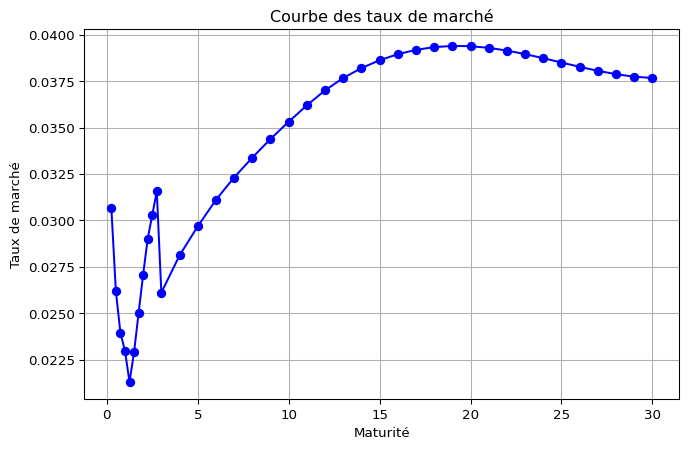

In [5]:
# Affichage d'une courbe homogène de taux de marché en fonction de la maturité
new_df['tx_h'] = new_df.apply(lambda x: 1 - x['tx'] if x['type'] == 'FUT' else x['tx'], axis=1)

plt.figure(figsize=(8, 5))
plt.plot(new_df["T"], new_df["tx_h"], marker='o', linestyle='-', color='b')
plt.xlabel('Maturité')
plt.ylabel('Taux de marché')
plt.title('Courbe des taux de marché')
plt.grid()
plt.show()

In [6]:
# Extraction des facteurs d'actualisation pour les Money Market
mm = new_df[new_df['type'] == 'MM']

mm.loc[:, 'B'] = 1 / (1 + mm['tx'] * mm['T'])
mm.loc[:, 'R'] = - np.log(mm['B']) / mm['T']

df_ZC = mm

In [7]:
# Extraction des facteurs d'actualisation pour les Futures

fut = new_df[new_df['type'] == 'FUT']

# concat à mm
df_ZC = pd.concat([df_ZC, fut], ignore_index=True)

mm_len = len(mm)

for i in range(mm_len, len(df_ZC)):
    df_ZC.loc[i, 'B'] = df_ZC.loc[i-1, 'B'] / (1 + (1 - df_ZC.loc[i, 'tx'])* 0.25)
    df_ZC.loc[i, 'R'] = - np.log(df_ZC.loc[i, 'B']) / df_ZC.loc[i, 'T']

In [8]:
# Extraction des facteurs d'actualisation pour les Swaps
swap = new_df[new_df['type'] == 'SWAP']
fut_len = len(fut)

df_ZC = pd.concat([df_ZC, swap], ignore_index=True)

for i in range(mm_len+fut_len, len(df_ZC)):
    T_n = df_ZC.loc[i, 'T']  # Récupère la valeur de T actuelle
    mask = (df_ZC['T'] < T_n) & (df_ZC['T'] % 1 == 0)  # Sélectionne uniquement les T entiers < T_n
    df_ZC.loc[i, 'B'] = (1 - df_ZC.loc[i, 'tx'] * sum(df_ZC.loc[mask, 'B'].fillna(0)))/(1+df_ZC.loc[i, 'tx'])
    df_ZC.loc[i, 'R'] = - np.log(df_ZC.loc[i, 'B']) / T_n

Text(0.5, 1.0, 'Courbe de taux zéro coupon discrétisée')

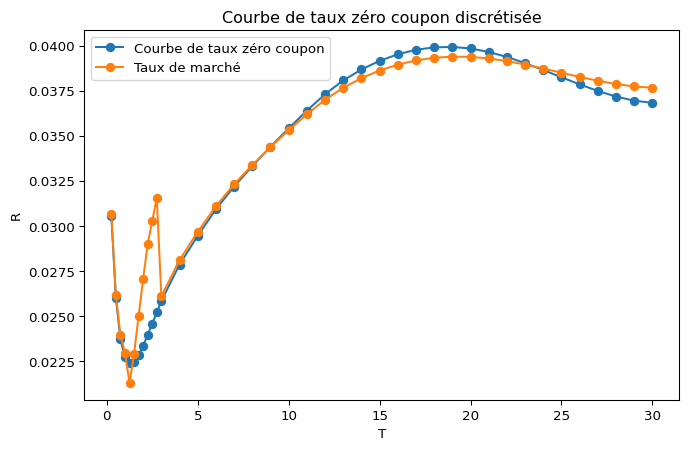

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(df_ZC['T'], df_ZC['R'], label='Courbe de taux zéro coupon', marker='o')
plt.plot(new_df["T"], new_df["tx_h"], label='Taux de marché', marker='o')
plt.xlabel('T')
plt.ylabel('R')
plt.legend()
plt.title('Courbe de taux zéro coupon discrétisée')

In [10]:
df_ZC = pd.concat([pd.DataFrame({"T": [0], "B": [1], "R": [0]}), df_ZC], ignore_index=True)

Text(0.5, 1.0, 'Courbe des taux forward avec interpolation linéaire')

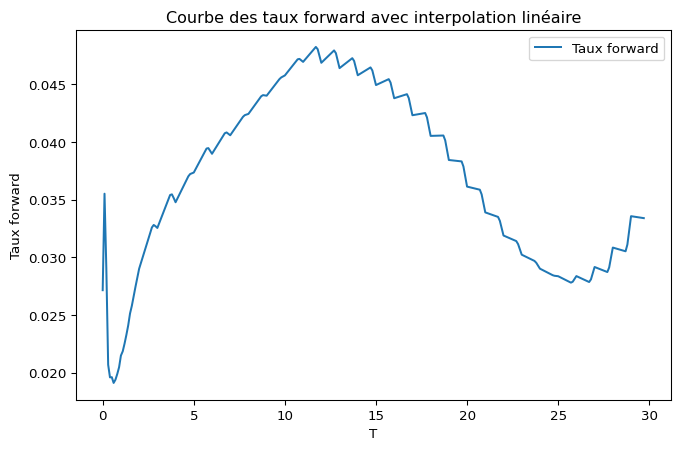

In [11]:
new_df_ZC= interpolate_and_update_df(df_ZC, 'T', 'R', kind='linear', start=0, end=30, step=0.1)

tau = 0.25  # 3 mois = 0.25 an

def compute_forward_rates(R, T_range, tau):
    """ Calcule les taux forward pour chaque maturité """
    fwd_rates = []
    T_values = []
    for i in range(len(T_range)-1):
        T = T_range[i]
        T_tau = T + tau
        if T_tau >= max(T_range):
            break  # Éviter d'extrapoler au-delà des données disponibles
        B_T = np.exp(-R[i] * T)
        R_T_tau = np.interp(T_tau, T_range, R) 
        B_T_tau = np.exp(-R_T_tau * T_tau)

        # Formule du taux forward instantané
        fwd_rate = (B_T / B_T_tau - 1) / tau
        fwd_rates.append(fwd_rate)
        T_values.append(T)

    return pd.DataFrame({"T": T_values, "tx_fwd": fwd_rates})

fwd_rates = compute_forward_rates(new_df_ZC['R'], new_df_ZC['T'], tau)

plt.figure(figsize=(8, 5))
plt.plot(fwd_rates["T"],fwd_rates["tx_fwd"], label='Taux forward')
plt.xlabel('T')
plt.ylabel('Taux forward')
plt.legend()
plt.title('Courbe des taux forward avec interpolation linéaire')

Text(0.5, 1.0, 'Courbe des taux forward avec interpolation par spline')

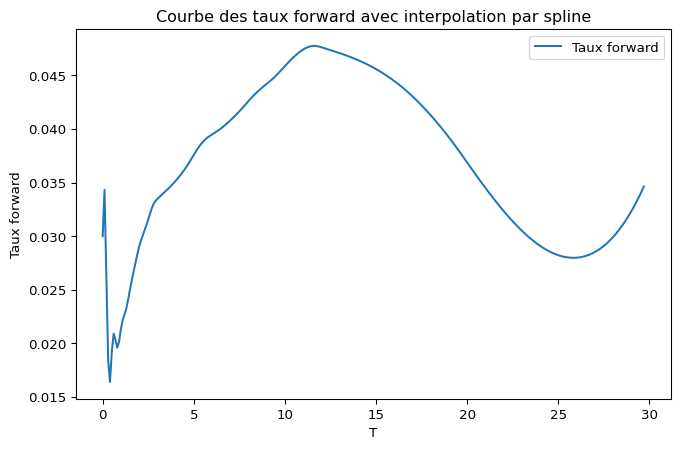

In [12]:
new_df_ZC= interpolate_and_update_df(df_ZC, 'T', 'R', kind='cubic', start=0, end=30, step=0.1)

tau = 0.25  # 3 mois = 0.25 an
fwd_rates = compute_forward_rates(new_df_ZC['R'], new_df_ZC['T'], tau)

plt.figure(figsize=(8, 5))
plt.plot(fwd_rates["T"],fwd_rates["tx_fwd"], label='Taux forward')
plt.xlabel('T')
plt.ylabel('Taux forward')
plt.legend()
plt.title('Courbe des taux forward avec interpolation par spline')

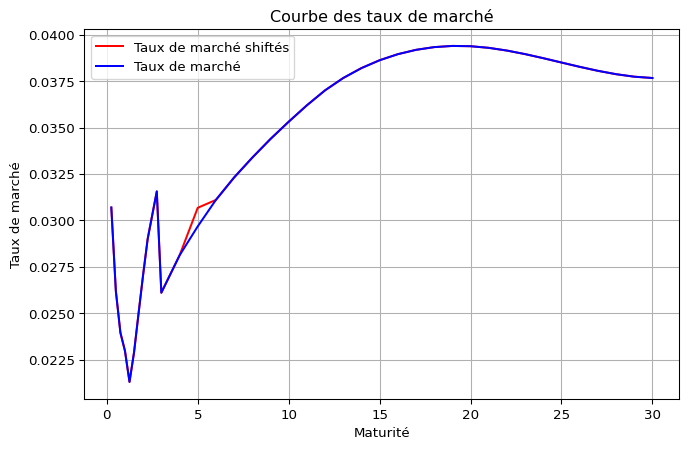

In [13]:
choc = 10/10000
new_df["tx_s"] = new_df.apply(lambda x: x['tx_h']+choc if x['T'] == 5 else x['tx_h'], axis=1)

# plot
plt.figure(figsize=(8, 5))
plt.plot(new_df["T"], new_df["tx_s"], label='Taux de marché shiftés', color="r")
plt.plot(new_df["T"], new_df["tx_h"], label='Taux de marché', color="b")
plt.xlabel('Maturité')
plt.ylabel('Taux de marché')
plt.title('Courbe des taux de marché')
plt.legend()
plt.grid()
plt.show()

new_df["tx_s"] = new_df.apply(lambda x: x['tx']+choc if x['T'] == 5 else x['tx'], axis=1)

Text(0.5, 1.0, 'Courbe de taux zéro coupon discrétisée')

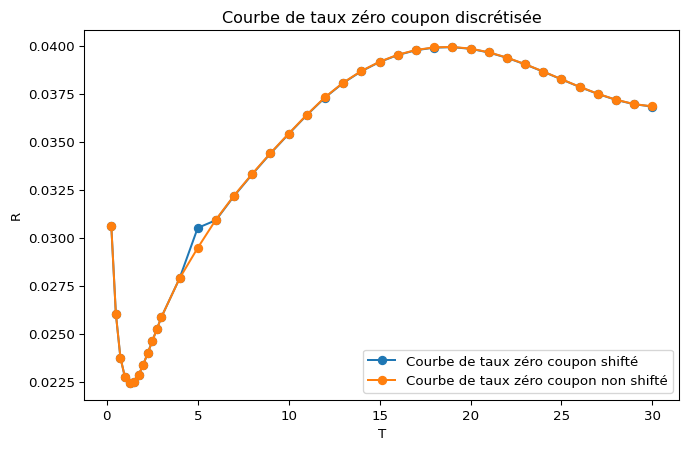

In [14]:
# Extraction des facteurs d'actualisation pour les Money Market
import numpy as np
import pandas as pd

def compute_discount_factors(new_df, col_T="T", col_tx="tx"):
    """
    Calcule les facteurs d'actualisation (B) et les taux zéro-coupon (R) 
    à partir des taux du marché pour les instruments MM, FUT et SWAP.

    Paramètres :
    - new_df : DataFrame contenant les taux du marché avec les colonnes spécifiées.
    - col_T : Nom de la colonne contenant les maturités (ex: "T").
    - col_tx : Nom de la colonne contenant les taux du marché (ex: "tx").

    Retourne :
    - df_ZC : DataFrame contenant les facteurs d'actualisation et les taux zéro-coupon.
    """

    # --- Extraction des données du marché monétaire (MM) ---
    mm = new_df[new_df['type'] == 'MM'].copy()
    mm.loc[:, 'B'] = 1 / (1 + mm[col_tx] * mm[col_T])
    mm.loc[:, 'R'] = - np.log(mm['B']) / mm[col_T]

    df_ZC = mm.copy()

    # --- Extraction des données Futures (FUT) ---
    fut = new_df[new_df['type'] == 'FUT'].copy()
    df_ZC = pd.concat([df_ZC, fut], ignore_index=True)

    mm_len = len(mm)

    # --- Calcul des facteurs d'actualisation pour les Futures ---
    for i in range(mm_len, len(df_ZC)):
        df_ZC.loc[i, 'B'] = df_ZC.loc[i-1, 'B'] / (1 + (1 - df_ZC.loc[i, col_tx]) * 0.25)
        df_ZC.loc[i, 'R'] = - np.log(df_ZC.loc[i, 'B']) / df_ZC.loc[i, col_T]

    # --- Extraction des données Swaps (SWAP) ---
    swap = new_df[new_df['type'] == 'SWAP'].copy()
    fut_len = len(fut)
    df_ZC = pd.concat([df_ZC, swap], ignore_index=True)

    # --- Calcul des facteurs d'actualisation pour les Swaps ---
    for i in range(mm_len + fut_len, len(df_ZC)):
        T_n = df_ZC.loc[i, col_T]  # Maturité actuelle
        mask = (df_ZC[col_T] < T_n) & (df_ZC[col_T] % 1 == 0)  # Sélection des T entiers < T_n

        sum_B = sum(df_ZC.loc[mask, 'B'].fillna(0))
        df_ZC.loc[i, 'B'] = (1 - df_ZC.loc[i, col_tx] * sum_B) / (1 + df_ZC.loc[i, col_tx])
        df_ZC.loc[i, 'R'] = - np.log(df_ZC.loc[i, 'B']) / T_n

    return df_ZC


df_ZC_s = compute_discount_factors(new_df, col_T="T", col_tx="tx_s")
df_ZC_s=pd.concat([pd.DataFrame({"T": [0], "B": [1], "R": [0]}), df_ZC_s], ignore_index=True)

plt.figure(figsize=(8, 5))
plt.plot(df_ZC_s.loc[1:,'T'], df_ZC_s.loc[1:,'R'], label='Courbe de taux zéro coupon shifté', marker='o')
plt.plot(df_ZC.loc[1:,"T"], df_ZC.loc[1:,"R"], label='Courbe de taux zéro coupon non shifté', marker='o')
plt.xlabel('T')
plt.ylabel('R')
plt.legend()
plt.title('Courbe de taux zéro coupon discrétisée')

Text(0.5, 1.0, 'Courbe des taux forward avec interpolation par spline')

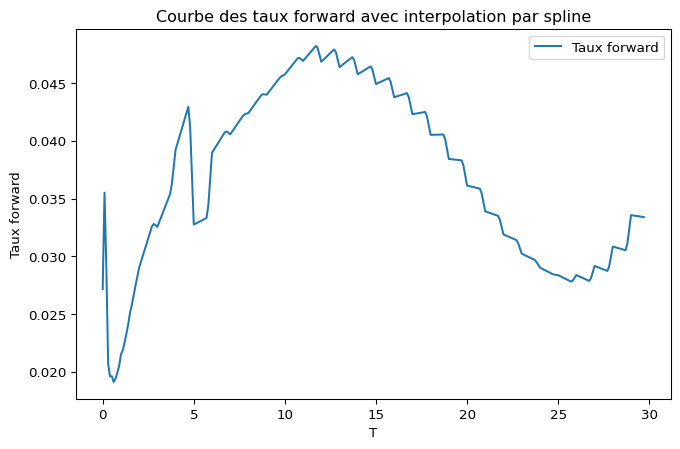

In [15]:
new_df_ZC= interpolate_and_update_df(df_ZC_s, 'T', 'R', kind='linear', start=0, end=30, step=0.1)

tau = 0.25  # 3 mois = 0.25 an
fwd_rates = compute_forward_rates(new_df_ZC['R'], new_df_ZC['T'], tau)

plt.figure(figsize=(8, 5))
plt.plot(fwd_rates["T"],fwd_rates["tx_fwd"], label='Taux forward')
plt.xlabel('T')
plt.ylabel('Taux forward')
plt.legend()
plt.title('Courbe des taux forward avec interpolation par spline')

Text(0.5, 1.0, 'Courbe des taux forward avec interpolation par spline')

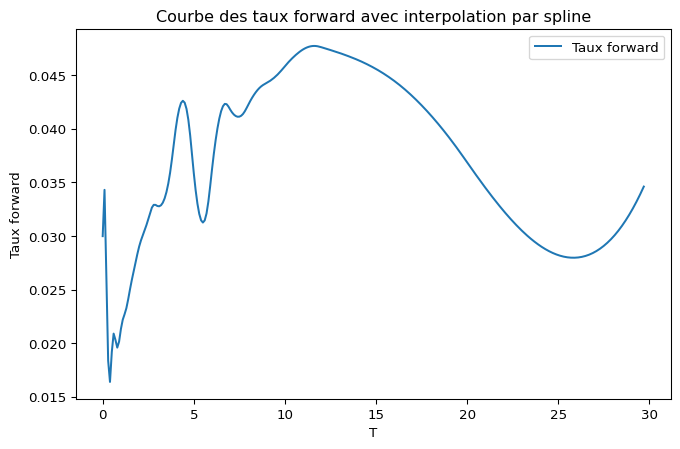

In [16]:
new_df_ZC= interpolate_and_update_df(df_ZC_s, 'T', 'R', kind='cubic', start=0, end=30, step=0.1)

tau = 0.25  # 3 mois = 0.25 an
fwd_rates = compute_forward_rates(new_df_ZC['R'], new_df_ZC['T'], tau)

plt.figure(figsize=(8, 5))
plt.plot(fwd_rates["T"],fwd_rates["tx_fwd"], label='Taux forward')
plt.xlabel('T')
plt.ylabel('Taux forward')
plt.legend()
plt.title('Courbe des taux forward avec interpolation par spline')

In [17]:
vol_data = pd.read_excel('data/Data_tx.xlsx', sheet_name='vol')
vol_data

,Strike en bps et en rel. / fwd,Vols Caplets,Vols Swaptions
0,-100,0.311859,0.311859
1,-50,0.283274,0.283274
2,-25,0.265921,0.265921
3,0,0.250000,0.250000
4,25,0.243451,0.243451
5,50,0.249019,0.249019
6,100,0.271828,0.271828


In [18]:
import numpy as np
from scipy.stats import norm

def price_oplet(N, delta_i, B_t_Ti, L_i_t, K, sigma_i, Ti, t, option_type='caplet'):
    """
    Calcule la valeur d'un caplet selon le modèle de Black.

    Paramètres :
    - N : Notional
    - delta_i : Période du caplet 
    - B_t_Ti : Facteur d'actualisation B(t, Ti)
    - L_i_t : Taux forward Li(t)
    - K : Strike du caplet
    - sigma_i : Volatilité implicite
    - Ti_1 : Date de début de la période
    - Ti : Date de fin de la période
    - t : Temps actuel

    Retourne :
    - Valeur du caplet
    """
    Ti_1 = Ti - delta_i
    d1 = (np.log(L_i_t / K) + 0.5 * sigma_i**2 * (Ti_1 - t)) / (sigma_i * np.sqrt(Ti_1 - t))
    d2 = sigma_i * np.sqrt(Ti_1 - t) - d1
    if option_type == 'caplet':
        price = N * delta_i * B_t_Ti * (L_i_t * norm.cdf(d1) - K * norm.cdf(-d2))
    elif option_type == 'floorlet':
        price = N * delta_i * B_t_Ti * (K * norm.cdf(d2) - L_i_t * norm.cdf(-d1))
    return price

for i in vol_data.index:
    # Notional
    N = 1  

    # Période du caplet
    delta_i = 1 

    # Maturité du caplet
    T=5 

    # Facteur d'actualisation B(t, Ti)
    B_t_Ti = df_ZC.loc[df_ZC['T'] == T+1, 'B'].values[0]

    # Taux forward Li(t)
    L_i_t = (1/delta_i) * ((df_ZC.loc[df_ZC['T'] == T, 'B'].values[0]/df_ZC.loc[df_ZC['T'] == T+1, 'B'].values[0]) - 1)

    # Strike du caplet
    K = L_i_t + vol_data.loc[i, 'Strike en bps et en rel. / fwd']/10000

    # Volatilité implicite
    sigma_i = vol_data.loc[i, "Vols Caplets"]  

    # Date de début de la période
    Ti = T + delta_i

    # Temps actuel
    t = 0  

    caplet_price = price_oplet(N, delta_i, B_t_Ti, L_i_t, K, sigma_i, Ti, t, option_type='caplet')
    vol_data.loc[i, 'Caplet Price MKT'] = caplet_price

vol_data

,Strike en bps et en rel. / fwd,Vols Caplets,Vols Swaptions,Caplet Price MKT
0,-100,0.311859,0.311859,0.012511
1,-50,0.283274,0.283274,0.009788
2,-25,0.265921,0.265921,0.008419
3,0,0.250000,0.250000,0.007137
4,25,0.243451,0.243451,0.006185
5,50,0.249019,0.249019,0.005661
6,100,0.271828,0.271828,0.005167


In [19]:
# pricer les swaptions

In [20]:
caplet_price_MKT = vol_data.loc[3, 'Caplet Price MKT']
print(f"Le prix de marché caplet sur euribor 12M de maturité T=5Y est de {caplet_price_MKT:.4%}")

Le prix de marché caplet sur euribor 12M de maturité T=5Y est de 0.7137%


In [21]:
import numpy as np
from scipy.stats import norm

def price_oplet_HW(N, delta_i, B_t_Ti, L_i_t, K, Ti, t, sigma_i, option_type='caplet', model='HW'):
    if model == "HW" :
        Z_t = delta_i * L_i_t + 1
        K = 1 + delta_i * K
        return price_oplet(N=N, delta_i=delta_i, B_t_Ti=B_t_Ti, L_i_t=Z_t, K=K, sigma_i=sigma_i, Ti=Ti, t=t, option_type=option_type)
    else:
        return price_oplet(N=N, delta_i=delta_i, B_t_Ti=B_t_Ti, L_i_t=L_i_t, K=K, sigma_i=sigma_i, Ti=Ti, t=t, option_type=option_type)

In [22]:
def Dichotomie(N, delta_i, B_t_Ti, L_i_t, K, Ti, t,caplet_price_MKT,option_type='caplet', model="HW",tol=1e-6, sigma_low=1/10000, sigma_high=1):
    """
    Extrait la volatilité implicite sigma en utilisant la méthode de dichotomie.
    """
    fmin = price_oplet_HW(N, delta_i, B_t_Ti, L_i_t, K, Ti, t, sigma_low, option_type=option_type, model=model)
    fmax = price_oplet_HW(N, delta_i, B_t_Ti, L_i_t, K, Ti, t, sigma_high,option_type=option_type, model=model)
    price = caplet_price_MKT
    if fmin>price :
        return sigma_low
    elif fmax<price :
        return sigma_high
    else:
        while sigma_high-sigma_low>tol:
            sigma_mid = (sigma_low + sigma_high) / 2
            fmin = price_oplet_HW(N, delta_i, B_t_Ti, L_i_t, K, Ti, t, sigma_low, option_type=option_type, model=model)
            fmid = price_oplet_HW(N, delta_i, B_t_Ti, L_i_t, K, Ti, t, sigma_mid,option_type=option_type, model=model)
            if ((fmin - price) * (fmid - price) > 0) : # jette la moitié de gauche
                sigma_low = sigma_mid
            else: # jette la moitié de droite
                sigma_high = sigma_mid
        sigma_mid = (sigma_low + sigma_high) / 2
        return sigma_mid
    

# Notional
N = 1  

# Période du caplet
delta_i = 1 

# Maturité du caplet
Ti=6

# Facteur d'actualisation B(t, Ti)
B_t_Ti = df_ZC.loc[df_ZC['T'] == Ti, 'B'].values[0]

# Taux forward Li(t)
L_i_t = (1/delta_i) * ((df_ZC.loc[df_ZC['T'] == Ti-1, 'B'].values[0]/df_ZC.loc[df_ZC['T'] == Ti, 'B'].values[0]) - 1)

# Strike du caplet
K = L_i_t + vol_data.loc[3, 'Strike en bps et en rel. / fwd']/10000

lambda_ = 5/100

sigma_i = Dichotomie(N, delta_i, B_t_Ti, L_i_t, K, Ti, t,caplet_price_MKT, option_type='caplet',model="HW")
print("Volatilité implicite (en %) :", sigma_i*100) 

Volatilité implicite (en %) : 0.9271045541763303


In [23]:
beta_Ti_Ti_1 =  ((1 - np.exp(- lambda_ * delta_i))/lambda_)**2
Ti_1 = Ti - delta_i
phi = (1 - np.exp(-2*lambda_*(Ti_1-t)))/(2*lambda_)
sigma = np.sqrt((sigma_i**2 * Ti_1)/ (beta_Ti_Ti_1 * phi))

print("Volatilité instantanée (en %) :", sigma*100) 

Volatilité instantanée (en %) : 1.071446257025021


In [24]:
for i in vol_data.index:
    # Notional
    N = 1  

    # Période du caplet
    delta_i = 1 

    # Maturité du caplet
    Ti=6

    # Facteur d'actualisation B(t, Ti)
    B_t_Ti = df_ZC.loc[df_ZC['T'] == Ti, 'B'].values[0]

    # Taux forward Li(t)
    L_i_t = (1/delta_i) * ((df_ZC.loc[df_ZC['T'] == Ti-1, 'B'].values[0]/df_ZC.loc[df_ZC['T'] == Ti, 'B'].values[0]) - 1)

    # Strike du caplet
    K = L_i_t + vol_data.loc[i, 'Strike en bps et en rel. / fwd']/10000

    sigma_i = sigma_i

    lambda_ = 5/100

    caplet_price = price_oplet_HW(N, delta_i, B_t_Ti, L_i_t, K, Ti, t, sigma_i, option_type='caplet', model='HW')
    vol_data.loc[i, 'Caplet Price HW'] = caplet_price

vol_data

,Strike en bps et en rel. / fwd,Vols Caplets,Vols Swaptions,Caplet Price MKT,Caplet Price HW
0,-100,0.311859,0.311859,0.012511,0.012015
1,-50,0.283274,0.283274,0.009788,0.009389
2,-25,0.265921,0.265921,0.008419,0.008215
3,0,0.250000,0.250000,0.007137,0.007137
4,25,0.243451,0.243451,0.006185,0.006156
5,50,0.249019,0.249019,0.005661,0.005269
6,100,0.271828,0.271828,0.005167,0.003771


In [25]:
for i in vol_data.index:
    N = 1
    delta_i = 1
    Ti = 6
    B_t_Ti = df_ZC.loc[df_ZC['T'] == Ti, 'B'].values[0]
    L_i_t = (1 / delta_i) * ((df_ZC.loc[df_ZC['T'] == Ti-1, 'B'].values[0] / df_ZC.loc[df_ZC['T'] == Ti, 'B'].values[0]) - 1)
    K = L_i_t + vol_data.loc[i, 'Strike en bps et en rel. / fwd'] / 10000
    lambda_ = 5 / 100
    caplet_price_MKT = vol_data.loc[i, 'Caplet Price HW']

    sigma_extracted =  Dichotomie(N, delta_i, B_t_Ti, L_i_t, K, Ti, t, caplet_price_MKT, option_type='caplet', model='Black')
    vol_data.loc[i, 'Sigma_HW'] = sigma_extracted

vol_data

,Strike en bps et en rel. / fwd,Vols Caplets,Vols Swaptions,Caplet Price MKT,Caplet Price HW,Sigma_HW
0,-100,0.311859,0.311859,0.012511,0.012015,0.288669
1,-50,0.283274,0.283274,0.009788,0.009389,0.267386
2,-25,0.265921,0.265921,0.008419,0.008215,0.258287
3,0,0.250000,0.250000,0.007137,0.007137,0.250009
4,25,0.243451,0.243451,0.006185,0.006156,0.242433
5,50,0.249019,0.249019,0.005661,0.005269,0.235466
6,100,0.271828,0.271828,0.005167,0.003771,0.223060


Text(0, 0.5, 'Volatilité')

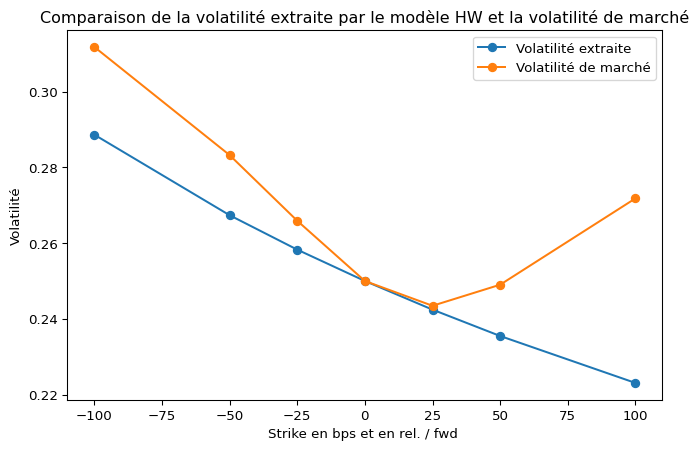

In [26]:
plt.figure(figsize=(8, 5))
plt.plot(vol_data["Strike en bps et en rel. / fwd"], vol_data["Sigma_HW"], label='Volatilité extraite', marker='o')
plt.plot(vol_data["Strike en bps et en rel. / fwd"], vol_data["Vols Caplets"], label='Volatilité de marché', marker='o')
plt.legend()
plt.title('Comparaison de la volatilité extraite par le modèle HW et la volatilité de marché')
plt.xlabel('Strike en bps et en rel. / fwd ')
plt.ylabel('Volatilité')

In [27]:
ATM  = L_i_t

In [28]:
import numpy as np
from scipy.integrate import quad

# Fonction phi(t) - variance cumulée
def phi(t, sigma, lambda_):
    return (sigma**2 / (2 * lambda_)) * (1 - np.exp(-2 * lambda_ * t))

# Fonction beta(t, T)
def beta(t, T, lambda_):
    return (1 - np.exp(-lambda_ * (T - t))) / lambda_

# Fonction gamma(t, T)
def gamma(t, T, sigma, lambda_):
    return (sigma / lambda_) * (np.exp(-lambda_ * (T - t)) - 1)

# Fonction B(t, T)
def B_t_T(t, T, B0_T, B0_t, X_t, sigma, lambda_):
    beta_t_T = beta(t, T, lambda_)**2
    phi_t = phi(t, sigma, lambda_)
    exponent = -0.5 * beta_t_T * phi_t - beta_t_T * X_t
    return (B0_T / B0_t) * np.exp(exponent)

# Fonction d'intégration avec paramètres supplémentaires
def integrand_mean(u, t, Xs, s, sigma, lambda_, T):
    # t = borne sup
    # s = borne inf
    # T = maturité
    Xt = Xs * np.exp(-lambda_ * (t - s))
    exp_part = np.exp(-lambda_ * (t - u))
    return Xt + exp_part * (phi(u, sigma, lambda_) + sigma * gamma(u, T, sigma, lambda_))

# Paramètres
T = Ti_1  = 5
Xs = X0 = 0  
s = 0
t = Ti_1 

# Calcul de la moyenne conditionnelle
mean_5_given_0, _ = quad(integrand_mean, s, t, args=(t, Xs, s, sigma, lambda_, T))
print(f"Moyenne conditionnelle de X_5 | X_0 : {mean_5_given_0:.6f}")

# Calcul de la variance conditionnelle (indépendant de gamma ici)

def compute_variance(sigma, lambda_, t, s):
    return (sigma**2) * (1 - np.exp(-2 * lambda_ * (t - s))) / (2 * lambda_)
var_5_given_0 = compute_variance(sigma, lambda_, t, s)
# var_5_given_0 = (sigma**2) * (1 - np.exp(-2 * lambda_ * (t - s))) / (2 * lambda_)
print(f"Variance conditionnelle de X_5 | X_0 : {var_5_given_0:.6f}")

Moyenne conditionnelle de X_5 | X_0 : 0.000000
Variance conditionnelle de X_5 | X_0 : 0.000452


In [29]:
Ti_1 = 5
Ti = 6

# Simulation Monte Carlo
n_simulations = 10000

payoffs = np.zeros(n_simulations)
for sim in range(n_simulations):
    phi_ = phi(Ti_1, sigma, lambda_)
    gamma_ = gamma(Ti_1,Ti, sigma, lambda_)

    # Moyenne
    mu_X = mean_5_given_0

    # Ecart-type
    sigma_X = np.sqrt(var_5_given_0)

    # X_5|X_0
    X = np.random.normal(mu_X, sigma_X)  

    # Calcul du prix B(5,6) selon Hull-White
    B0_6 = df_ZC.loc[df_ZC['T'] == Ti, 'B'].values[0] # B(0,6)
    B0_5 = df_ZC.loc[df_ZC['T'] == Ti_1, 'B'].values[0] # B(0,5)

    B_5_6 = B_t_T(5, 6, B0_6, B0_5, X, sigma, lambda_)
    B_5_5 = B_t_T(5, 5, B0_5, B0_5, X, sigma, lambda_)

    # Calcul du taux forward L_i_t
    L_i_t = ((B_5_5 / B_5_6) - 1)
    bp = 100/10000

    # Définition du strike
    strike = ATM - bp

    # Barrière
    B = ATM + bp

    # Payoff de l'option
    payoff = np.maximum(L_i_t - strike, 0) * (L_i_t < B)
    payoffs[sim] = payoff

# Prix de l'option call
call_price = B0_6 * np.mean(payoffs)
print(f"Prix du call : {call_price:.6f}")

Prix du call : 0.002970


In [30]:
# Simulation Monte Carlo
n_simulations = 10000

payoffs = np.zeros(n_simulations)
X0 = 0
Ti = 6
Ti_1 = 5
X = np.zeros(Ti)
X[0] = X0

for sim in range(n_simulations):
    phi_ = phi(Ti_1, sigma, lambda_)
    gamma_ = gamma(Ti_1,Ti, sigma, lambda_)

    for i in range(1,Ti):
        t = i
        s = i-1
        T = 5 
        Xs = X[i-1]

        # Calcul de la moyenne conditionnelle
        mu_X, _ = quad(integrand_mean, s, t, args=(t, Xs, s, sigma, lambda_, T))
        sigma_X = np.sqrt(compute_variance(sigma, lambda_, t, s))
        X[i] = np.random.normal(mu_X, sigma_X)

    # Calcul du prix B(5,6) selon Hull-White
    B0_6 = df_ZC.loc[df_ZC['T'] == Ti, 'B'].values[0] # B(0,6)
    B0_5 = df_ZC.loc[df_ZC['T'] == Ti_1, 'B'].values[0] # B(0,5)

    B_5_6 = B_t_T(5, 6, B0_6, B0_5, X[Ti_1], sigma, lambda_)
    B_5_5 = B_t_T(5, 5, B0_5, B0_5, X[Ti_1], sigma, lambda_)

    # Calcul du taux forward L_i_t
    L_i_t = ((B_5_5 / B_5_6) - 1)
    bp = 100/10000

    # Définition du strike
    strike = ATM - bp

    # Barrière
    B = ATM + bp

    # Payoff de l'option
    payoff = np.maximum(L_i_t - strike, 0) * (L_i_t < B)
    payoffs[sim] = payoff

# Prix de l'option call
call_price = B0_6 * np.mean(payoffs)
print(f"Prix du call : {call_price:.6f}")

Prix du call : 0.003026


In [31]:
Ti_1 = 5
Ti = 6

# Simulation Monte Carlo
n_simulations = 10000

payoffs = np.zeros(n_simulations)
for sim in range(n_simulations):
    phi_ = phi(Ti_1, sigma, lambda_)
    gamma_ = gamma(Ti_1,Ti, sigma, lambda_)

    # Moyenne
    mu_X = mean_5_given_0

    # Ecart-type
    sigma_X = np.sqrt(var_5_given_0)

    # X_5|X_0
    X = np.random.normal(mu_X, sigma_X)  

    # Calcul du prix B(5,6) selon Hull-White
    B0_6 = df_ZC.loc[df_ZC['T'] == Ti, 'B'].values[0] # B(0,6)
    B0_5 = df_ZC.loc[df_ZC['T'] == Ti_1, 'B'].values[0] # B(0,5)

    B_5_6 = B_t_T(5, 6, B0_6, B0_5, X, sigma, lambda_)
    B_5_5 = B_t_T(5, 5, B0_5, B0_5, X, sigma, lambda_)

    # Calcul du taux forward L_i_t
    L_i_t = ((B_5_5 / B_5_6) - 1)
    bp = 100/10000

    # Définition du strike
    strike = ATM # - bp

    # Barrière
    B = np.inf#ATM + bp

    # Payoff de l'option
    payoff = np.maximum(L_i_t - strike, 0) * (L_i_t < B)
    payoffs[sim] = payoff

# Prix de l'option call
call_price = B0_6 * np.mean(payoffs)
print(f"Prix du call : {call_price:.6f}")

Prix du call : 0.007296


In [32]:
# Option bermudienne

# Simulation Monte Carlo
n_simulations = 10000

payoffs = np.zeros(n_simulations)
X0 = 0
Ti = 6
Ti_1 = 5
X = np.zeros(Ti)
X[0] = X0

for sim in range(n_simulations):
    phi_ = phi(Ti_1, sigma, lambda_)
    gamma_ = gamma(Ti_1,Ti, sigma, lambda_)
    L_i_t = np.zeros(Ti_1)
    for i in range(1,Ti):
        t = i
        s = i-1
        T = 5 
        Xs = X[s]

        # Calcul de la moyenne conditionnelle
        mu_X, _ = quad(integrand_mean, s, t, args=(t, Xs, s, sigma, lambda_, T))
        sigma_X = np.sqrt(compute_variance(sigma, lambda_, t, s))
        X[i] = np.random.normal(mu_X, sigma_X)

        # Calcul du prix B(5,6) selon Hull-White
        Bi_t = df_ZC.loc[df_ZC['T'] == t, 'B'].values[0] # B(0,6)
        Bi_s = df_ZC.loc[df_ZC['T'] == s, 'B'].values[0] # B(0,5)

        B_s_t = B_t_T(s, t, Bi_t, Bi_s, X[i], sigma, lambda_)
        B_s_s = B_t_T(s, s, Bi_s, Bi_s, X[i], sigma, lambda_)

        # Calcul du taux forward L_i_t
        L_i_t[i-1] = (1 / (t-s)) * ((B_s_s / B_s_t) - 1)
    
    # Calcul du prix B(5,6) selon Hull-White
    B0_6 = df_ZC.loc[df_ZC['T'] == Ti, 'B'].values[0] # B(0,6)
    B0_5 = df_ZC.loc[df_ZC['T'] == Ti_1, 'B'].values[0] # B(0,5)

    B_5_6 = B_t_T(5, 6, B0_6, B0_5, X[Ti_1], sigma, lambda_)
    B_5_5 = B_t_T(5, 5, B0_5, B0_5, X[Ti_1], sigma, lambda_)

    # Calcul du taux forward L_i_t
    L_t = ((B_5_5 / B_5_6) - 1)
    bp = 100/10000


    # Définition du strike
    strike = ATM - bp

    # Barrière
    B = ATM + bp

    # Payoff de l'option
    payoff = np.maximum(L_t - strike, 0) * (np.max(L_i_t) < B)
    payoffs[sim] = payoff

# Prix de l'option call
call_price = B0_6 * np.mean(payoffs)
print(f"Prix du call : {call_price:.6f}")

Prix du call : 0.003020


In [33]:
# Liste des lambda à tester
lambdas = np.linspace(0.01, 1, 15)  # Exemple de grille de lambda
results = []

Ti_1 = 5
Ti = 6
# Boucle principale sur les lambdas
for lambda_ in lambdas:
    n_touched = 0
    payoffs = np.zeros(n_simulations)

    for sim in range(n_simulations):
        phi_ = phi(Ti_1, sigma, lambda_)
        gamma_ = gamma(Ti_1,Ti, sigma, lambda_)

        # Moyenne
        mu_X = mean_5_given_0

        # Ecart-type
        sigma_X = np.sqrt(var_5_given_0)

        # X_5|X_0
        X = np.random.normal(mu_X, sigma_X)  

        # Calcul du prix B(5,6) selon Hull-White
        B0_6 = df_ZC.loc[df_ZC['T'] == Ti, 'B'].values[0] # B(0,6)
        B0_5 = df_ZC.loc[df_ZC['T'] == Ti_1, 'B'].values[0] # B(0,5)

        B_5_6 = B_t_T(5, 6, B0_6, B0_5, X, sigma, lambda_)
        B_5_5 = B_t_T(5, 5, B0_5, B0_5, X, sigma, lambda_)

        L_i_t = ((B_5_5 / B_5_6) - 1)
        bp = 100 / 10000
        strike = ATM - bp
        B = ATM + bp

        payoff = np.maximum(L_i_t - strike, 0) * (L_i_t < B)
        payoffs[sim] = payoff

        # Vérification de la barrière
        if np.any(L_i_t>= B):
            n_touched += 1

    prob_toucher_barriere = n_touched / n_simulations

    call_price = B0_6 * np.mean(payoffs)
    results.append((lambda_, call_price,prob_toucher_barriere))

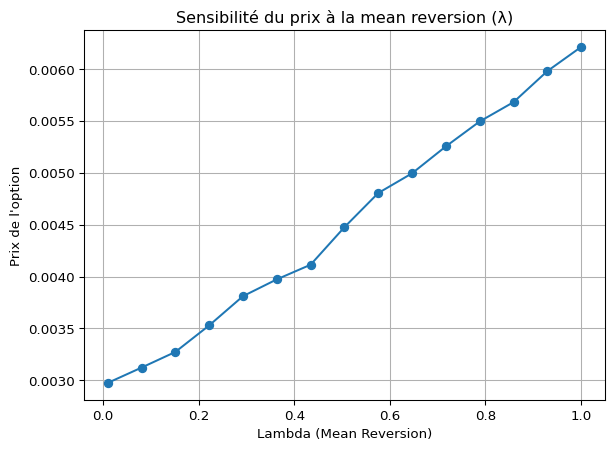

In [34]:
# Optionnel : Graphique de la sensibilité
import matplotlib.pyplot as plt

lambdas, prices, probabilities = zip(*results)
plt.plot(lambdas, prices, marker='o')
plt.xlabel('Lambda (Mean Reversion)')
plt.ylabel('Prix de l\'option')
plt.title('Sensibilité du prix à la mean reversion (λ)')
plt.grid(True)
plt.show()

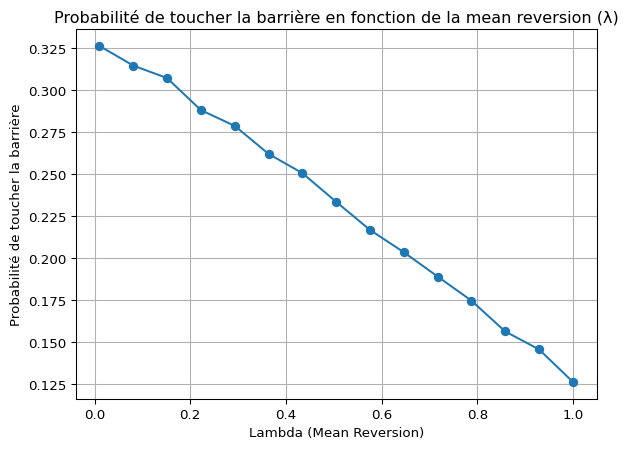

In [35]:
plt.plot(lambdas, probabilities, marker='o')
plt.xlabel('Lambda (Mean Reversion)')
plt.ylabel('Probabilité de toucher la barrière')
plt.title('Probabilité de toucher la barrière en fonction de la mean reversion (λ)')
plt.grid(True)
plt.show()